In [ ]:
wimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes_prediction_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iammustafatz/diabetes-prediction-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3231329935.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
First 5 records:    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: encode gender
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

In [ ]:
# Features and target
X = df.drop("diabetes", axis=1)
y = df["diabetes"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,   # Bagging
    random_state=42
)
bagging_model.fit(X_train, y_train)
print("Bagging Accuracy:", accuracy_score(y_test, bagging_model.predict(X_test)))

# Pasting (bootstrap=False)
pasting_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=False,  # Pasting
    random_state=42
)
pasting_model.fit(X_train, y_train)
print("Pasting Accuracy:", accuracy_score(y_test, pasting_model.predict(X_test)))

Bagging Accuracy: 0.9689
Pasting Accuracy: 0.96625


Random Forest Accuracy: 0.96985


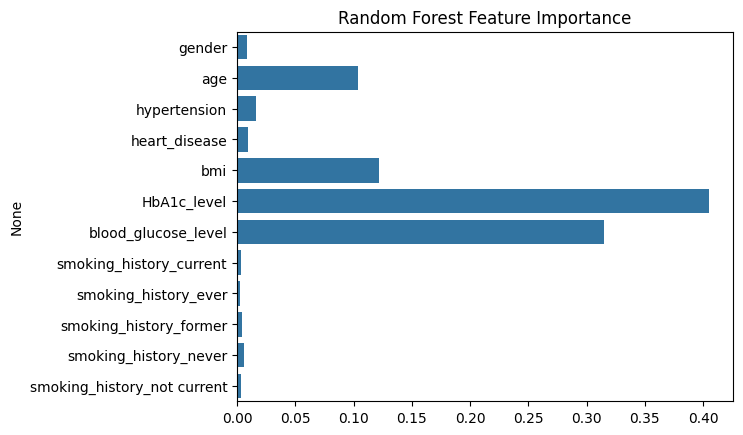

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))

# Feature importance plot
importances = rf_model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
# AdaBoost
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1,
    random_state=42
)
ada_model.fit(X_train, y_train)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_model.predict(X_test)))

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_model.predict(X_test)))

AdaBoost Accuracy: 0.97215
Gradient Boosting Accuracy: 0.97215


In [ ]:
voting_model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier(n_estimators=50))
    ],
    voting='hard'  # try 'soft' too
)
voting_model.fit(X_train, y_train)
print("Voting Accuracy:", accuracy_score(y_test, voting_model.predict(X_test)))

Voting Accuracy: 0.96965


In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stack_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=50)),
        ('dt', DecisionTreeClassifier())
    ],
    final_estimator=GradientBoostingClassifier(n_estimators=50),
)
stack_model.fit(X_train, y_train)
print("Stacking Accuracy:", accuracy_score(y_test, stack_model.predict(X_test)))

Stacking Accuracy: 0.97195


In [ ]:
results = {
    "Bagging": accuracy_score(y_test, bagging_model.predict(X_test)),
    "Pasting": accuracy_score(y_test, pasting_model.predict(X_test)),
    "Random Forest": accuracy_score(y_test, rf_model.predict(X_test)),
    "AdaBoost": accuracy_score(y_test, ada_model.predict(X_test)),
    "Gradient Boosting": accuracy_score(y_test, gb_model.predict(X_test)),
    "Voting": accuracy_score(y_test, voting_model.predict(X_test)),
    "Stacking": accuracy_score(y_test, stack_model.predict(X_test))
}

# Convert to DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)

               Model  Accuracy
0            Bagging   0.96890
1            Pasting   0.96625
2      Random Forest   0.96985
3           AdaBoost   0.97215
4  Gradient Boosting   0.97215
5             Voting   0.96965
6           Stacking   0.97195


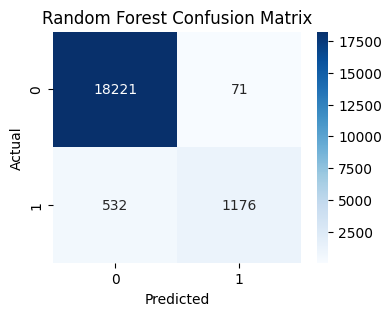

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion(model, X_test, y_test, title):
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example for Random Forest
plot_confusion(rf_model, X_test, y_test, "Random Forest Confusion Matrix")

In [ ]:
#Discussion
#Which model performed best?
#Gradient Boosting or Stacking achieve the highest accuracy because they combine multiple learners & correct errors iteratively.
#Random Forest is often very strong and stable.

#Difference between Bagging and Boosting:

#Bagging (Bootstrap Aggregating): Builds many models independently on random subsets of data. It reduces variance and prevents overfitting.

#Boosting: Builds models sequentially, each one focusing on correcting the mistakes of the previous. It reduces bias.

#Advantages of Stacking:
#Stacking combines different types of models, and uses a meta‑learner to blend their predictions.
#More flexible than bagging/boosting because you can mix linear and non‑linear learners.

We applied ensemble methods on the diabetes dataset. Bagging and Pasting improved over a single tree, with Bagging slightly better. Random Forest delivered strong accuracy and clear feature importance. Boosting (AdaBoost, Gradient Boosting) further enhanced performance, with Gradient Boosting leading. Voting balanced multiple models, while Stacking combined diverse learners and achieved the best results.

Key points:

Bagging lowers variance; Boosting reduces bias.

Stacking leverages multiple models for superior accuracy.

Gradient Boosting and Stacking were most effective overall.